In [3]:
# !pip install dython

In [208]:
# library untuk dataframe dan kalkulasi
import numpy as np 
import pandas as pd

# library untuk data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk asosiasi antar feature kategorikal dengan numerik
from dython.nominal import associations
from dython.nominal import correlation_ratio

import warnings
warnings.filterwarnings('ignore')

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Users/zahramawar/diaz-ds-projects/env/bin/python
3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:05:16) 
[Clang 12.0.1 ]
sys.version_info(major=3, minor=8, micro=13, releaselevel='final', serial=0)


In [11]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/diazers/dataset/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# cek properties dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#cek data null
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# mengubah kolom TotalCharges menjadi numerik
data['TotalCharges'] = data['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ''

**- value pada kolom `SeniorCitizen` sudah menjadi 'Yes' dan 'No'**

ternyata menghasilkan error, hal ini bisa terjadi karena :  
- A column contain null
- A column contains value with only space
- A value contains a comma
- A value contains special characters

kita sudah lihat di `data.head` tidak ada null value di setiap kolom dan juga value pada kolom `TotalCharges` menggunakan titik bukan koma, kemungkinan terdapat rows yang hanya berisi spasi, selanjutnya kita akan cek


In [15]:
# mengecek apakah rows yang memiliki value hanya spasi (" ") di kolom  TotalCharges

data['TotalCharges'][data['TotalCharges'] == ' '].count()

11

terdapat 11 baris di kolom `TotalCharges` yang valuenya hanya spasi (" "), selanjutnya kita akan lihat barisnya dalam bentuk dataframe

In [16]:
(data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


benar terdapat 11 baris yang hanya berisi spasi (" "). selanjutnya kita akan cek di semua kolom apakah hal seperti ini juga terdapat pada kolom lain

In [17]:
for col in data:
  print(col)
  space = data[col][data[col] == ' '].count()
  print(f"Number of space value:", {space})

customerID
Number of space value: {0}
gender
Number of space value: {0}
SeniorCitizen
Number of space value: {0}
Partner
Number of space value: {0}
Dependents
Number of space value: {0}
tenure
Number of space value: {0}
PhoneService
Number of space value: {0}
MultipleLines
Number of space value: {0}
InternetService
Number of space value: {0}
OnlineSecurity
Number of space value: {0}
OnlineBackup
Number of space value: {0}
DeviceProtection
Number of space value: {0}
TechSupport
Number of space value: {0}
StreamingTV
Number of space value: {0}
StreamingMovies
Number of space value: {0}
Contract
Number of space value: {0}
PaperlessBilling
Number of space value: {0}
PaymentMethod
Number of space value: {0}
MonthlyCharges
Number of space value: {0}
TotalCharges
Number of space value: {11}
Churn
Number of space value: {0}


ternyata tidak ada, kolom yang lain benar-benar null, hanya kolom `TotalCharges` yang berii value hanya spasi di beberapa baris

karena data dengan spasi hanya 11 data dan persentasenya sangat kecil dari keseluruhan baris data, bahkan dibawah 1 persen, data bisa kita `drop`

In [18]:
# drop baris data dengan spasi

drop_rows = data[(data['TotalCharges'] == ' ')].index
data.drop(drop_rows, inplace = True)


In [19]:
# mengecek apakah rows yang memiliki value hanya spasi (" ") di kolom  TotalCharges masih ada

data['TotalCharges'][data['TotalCharges'] == ' '].count()

0

In [20]:
print(f"is there null values : {data.isnull().sum().any()}")
# cek data duplicate
print(f"is there duplicate values : {data.duplicated().any()}")

is there null values : False
is there duplicate values : False


In [21]:
# mengubah kolom TotalCharges menjadi numerik
data['TotalCharges'] = data['TotalCharges'].astype('float64')

# mengubah value '1' menjadi 'yes' di kolom SeniorCitizen 
data['SeniorCitizen'] = data['SeniorCitizen'].map({1 : 'Yes', 0 : "No"})

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
# cek data duplicate
data.duplicated().any()

False

In [23]:
# melihat jumlah data tiap kategori pada tiap kolom kategorik
# melihat jumlah dan apa saja unique value pada tiap kolom 

categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
  print(col)
  unique = data[col].nunique()
  print(f"Number of unique value:", {unique})
  print(data[col].unique())
  print(data[col].value_counts())
  print('\n')

  # print(col)
  # unique = data[col].nunique()
  # print(f"Number of unique value:", {unique})
  # print(data[col].unique())
  # print("\n")

customerID
Number of unique value: {7032}
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64


gender
Number of unique value: {2}
['Female' 'Male']
Male      3549
Female    3483
Name: gender, dtype: int64


SeniorCitizen
Number of unique value: {2}
['No' 'Yes']
No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64


Partner
Number of unique value: {2}
['Yes' 'No']
No     3639
Yes    3393
Name: Partner, dtype: int64


Dependents
Number of unique value: {2}
['No' 'Yes']
No     4933
Yes    2099
Name: Dependents, dtype: int64


PhoneService
Number of unique value: {2}
['No' 'Yes']
Yes    6352
No      680
Name: PhoneService, dtype: int64


MultipleLines
Number of unique value: {3}
['No phone service' 'No' 'Yes']
No                  3385

- setiap ID merupakan unique value, karena jumlah unique value pada kolom ID sama dengan total jumlah kolom 

- `tidak ada data yang null` dan `tidak ada data duplikat` pada setiap kolom

- terlihat bahwa data kebanyakan kolom adalah data bertipe data string/object yang bersifat kategorik, hanya beberapa kolom yang merupakan kolom tipe data numerik yaitu `SeniorCitizen`, `tenure`, dan `MonthlyCharges`, tetapi ada kolom yang harusnya bertipe data numerik yaitu `TotalCharges`, selanjutnya akan diubah menjadi numerik.
- kolom `SeniorCitizen` penulisannya menggunakan cara biner (1 dan 0), sedangkan kolom lain yang berkategori dua penulisannya dengan cara 'yes' dan 'no'. dengan alasan penyeragaman untuk saat ini kita ubah menjadi 'yes' dan 'no' terlebih dahulu. 1 adalah 'yes' dan 0 adalah 'no'



- baris data sudah berkurang dari **7043** menjadi **7032**
- kolom `TotalCharges` sudah berubah menjadi bertipe data numerik
- sudah tidak ada data null / missing values

| Feature Name	|Description	| Data Type |
|--- | --- |--- |
|customerID	|Contains customer ID	|unique ID, categorical, nominal|
|gender|	whether the customer female or male	|categorical, nominal
|SeniorCitizen	|Whether the customer is a senior citizen or not (Yes, No)	|categorical, nominal
|Partner	|Whether the customer has a partner or not (Yes, No)	|categorical, nominal
|Dependents	|Whether the customer has dependents or not (Yes, No)	|categorical, nominal
|tenure	|Number of months the customer has stayed with the company	|numeric, int
|PhoneService	|Whether the customer has a phone service or not (Yes, No)	|categorical, nominal
|MultipleLines	|Whether the customer has multiple lines or not (Yes, No, No phone service)	|categorical, nominal
|InternetService	|Customer’s internet service provider (DSL, Fiber optic, No)	|categorical, nominal
|OnlineSecurity	|Whether the customer has online security or not (Yes, No, No internet service)	|categorical, nominal
|OnlineBackup	|Whether the customer has online backup or not (Yes, No, No internet service)	|categorical, nominal
|DeviceProtection	|Whether the customer has device protection or not (Yes, No, No internet service)	|categorical, nominal
|TechSupport	|Whether the customer has tech support or not (Yes, No, No internet service)	|categorical, nominal
|streamingTV	|Whether the customer has streaming TV or not (Yes, No, No internet service)	|categorical, nominal
|streamingMovies	|Whether the customer has streaming movies or not (Yes, No, No internet service)	|categorical, nominal
|Contract	|The contract term of the customer (Month-to-month, One year, Two year)	|categorical, nominal
|PaperlessBilling	|Whether the customer has paperless billing or not (Yes, No)	|categorical, nominal
|PaymentMethod	|The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)	|categorical, nominal
|MonthlyCharges	|The amount charged to the customer monthly 	 |numeric , float
|TotalCharges	|The total amount charged to the customer 	|numeric, float
|Churn	|Whether the customer churned or not (Yes or No)	|categorical, nominal

In [24]:
# jumlah dari masing-masing pengguna jasa phoneservice dan internet service
df1 = len(data[(data.InternetService == "No") & (data.PhoneService == "Yes")])
df2 = len(data[(data.InternetService != "No") & (data.PhoneService == "Yes")])
df3 = len(data[(data.InternetService != "No") & (data.PhoneService == "No")])

df4 = [{'PhoneService only': df1, 'PhoneService & InternetService': df2, 'InternetService only': df3}]

df_plot = pd.DataFrame(df4)
df_plot

,PhoneService only,PhoneService & InternetService,InternetService only
0,1520,4832,680


- terdapat `1520` pelanggan yang  `hanya menggunakan telepon`
- terdapat `680` pelanggan yang `hanya menggunakan internet` 
- terdapat `4832` pelanggan yang `menggunakan keduanya (telepon & internet)`  
<br>

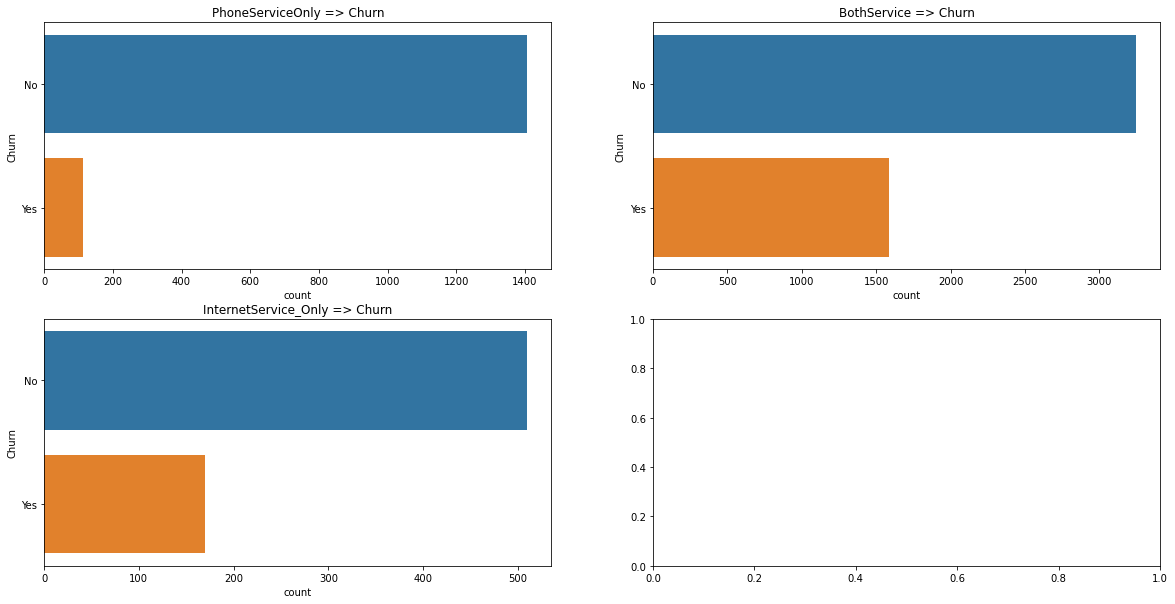

In [25]:
PhoneService_only = data[(data.InternetService == "No") & (data.PhoneService == "Yes")]
BothService = data[(data.InternetService != "No") & (data.PhoneService == "Yes")]
InternetService_Only = data[(data.InternetService != "No") & (data.PhoneService == "No")]

fig, axs = plt.subplots(2, 2, figsize=(20,10))

sns.countplot(y = 'Churn', data=PhoneService_only, ax=axs[0,0]).set(title='PhoneServiceOnly => Churn')
sns.countplot(y = 'Churn', data=BothService, ax=axs[0,1]).set(title='BothService => Churn')
sns.countplot(y = 'Churn', data=InternetService_Only, ax=axs[1,0]).set(title='InternetService_Only => Churn')

plt.show()


In [26]:
# melihat beberapa descriptive statitics measure pada kolom numerik

data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [27]:
def describe(data, stats):
    d = data.describe()
    return d.append(data.reindex(d.columns, axis = 1).agg(stats))

df_desc = describe(data, ["sum", "var", "sem", "kurt", "skew"])
df_desc.loc['range'] = df_desc.loc['max'] - df_desc.loc['min']

display(df_desc.T)

,count,mean,std,min,25%,50%,75%,max,sum,var,sem,kurt,skew,range
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00,227990.0,6.024698e+02,0.292704,-1.387823,0.237731,71.0
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75,455661.0,9.051658e+02,0.358777,-1.256156,-0.222103,100.5
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80,16056168.7,5.138252e+06,27.031384,-0.231799,0.961642,8666.0


- Skewness yang bernilai positif berarti ekor distribusi berada di sebelah kanan nilai terbanyak (left skewness). Berarti, sebagian besar distribusi berada di nilai rendah. 
- Skewness yang bernilai negatif berarti ekor distribusi berada di sebelah kiri (right skewness), menunjukkan bahwa sebagian besar nilai berada di sisi kanan kurva. 
- Sementara skewness bernilai nol berarti nilai terdistribusi secara simetris, dengan jarak antara ekor distribusi sebelah kanan dan kiri sama besar.
<br>

As a general rule of thumb:  
- If skewness is `less than -1 or greater than 1`, the distribution is `highly skewed`.
- If skewness is `between -1 and -0.5 or between 0.5 and 1`, the distribution is `moderately skewed`.
- If skewness is `between -0.5 and 0.5`, the distribution is `approximately symmetric`.
<br>

- kolom `tenure` positive skewed / left skewed tetapi mendekati distribusi normal
- kolom `MonthlyCharges` negative skewed / left skewed tetapi mendekati distribusi normal
- kolom `TotalCharges` mendekati -1, sehingga sangat negative skewed / right skewed

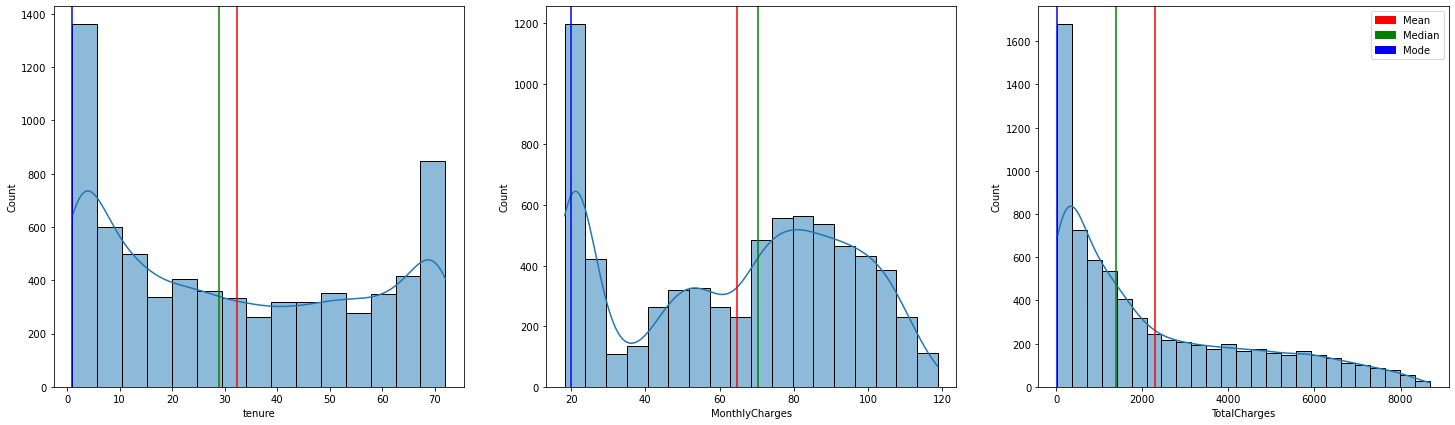

In [28]:
import matplotlib.patches as mpatches

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, axes = plt.subplots(ncols=3, figsize=(25, 7))

numerik_cols = list(data.select_dtypes(exclude=['object']).columns.to_list())
plot_data = data[numerik_cols]


for col, ax in zip(plot_data, axes.flat):
    sns.histplot(ax=ax, data=plot_data, x=plot_data[col], kde=True)
    desc = plot_data[col].describe()
    ax.axvline(data[col].mean(), color='r')
    ax.axvline(data[col].median(), color='g')
    ax.axvline(data[col].mode()[0], color='b')

red_patch = mpatches.Patch(color='red', label='Mean')
green_patch = mpatches.Patch(color='green', label='Median')
blue_patch = mpatches.Patch(color='blue', label='Mode')

plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

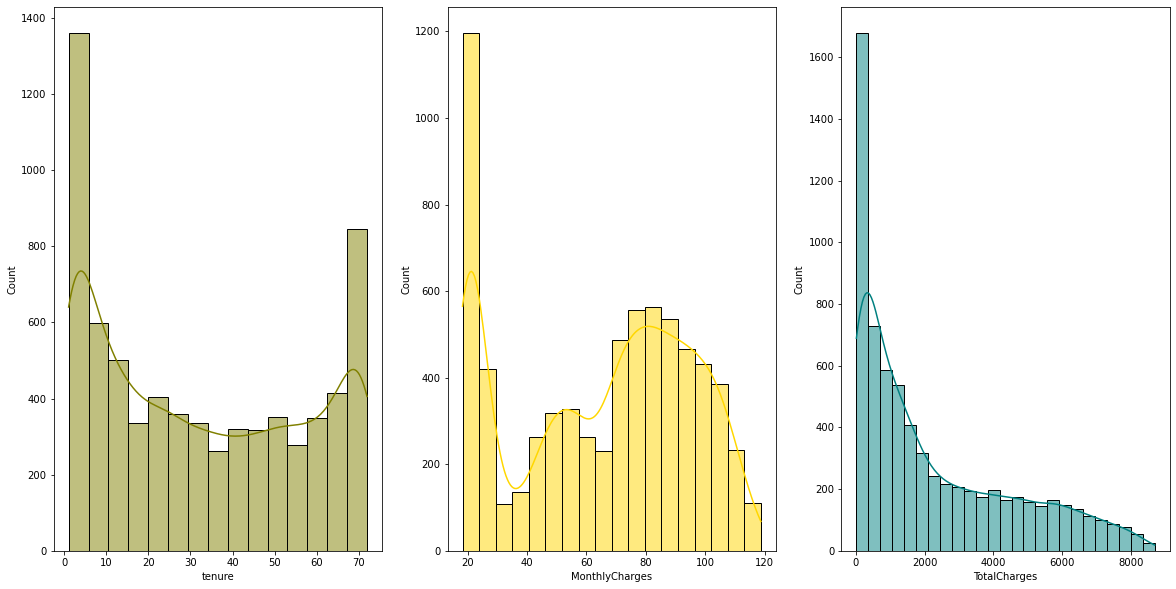

In [29]:
# visualisasi data histogram dan bentuk distribusi data
fig, axs = plt.subplots(ncols=3, figsize=(20,10))

sns.histplot(data=data, x="tenure", kde=True, color="olive", ax=axs[0])
sns.histplot(data=data, x="MonthlyCharges", kde=True, color="gold", ax=axs[1])
sns.histplot(data=data, x="TotalCharges", kde=True, color="teal", ax=axs[2])

plt.show()

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

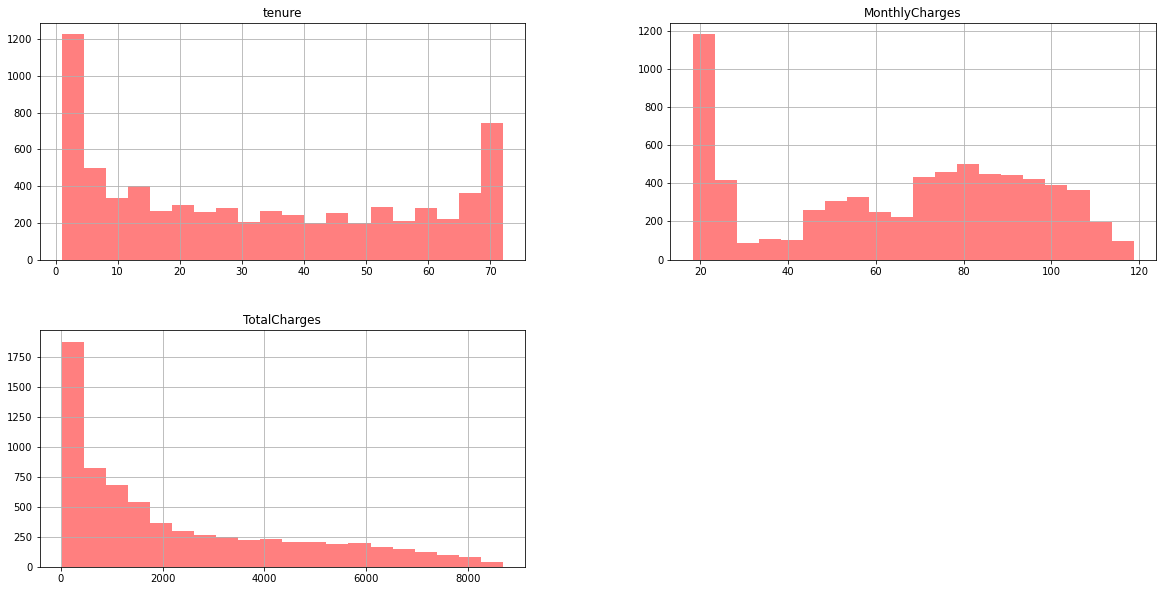

In [30]:
# visualisasi data histogram dan bentuk distribusi data dengan menentukan jumlah bins sesuai dengan keinginan kita apabila ingin lebih detail
Numerikal_Ratio = ['tenure', 'MonthlyCharges',	'TotalCharges']

plt.rcParams['figure.figsize'] = (20, 10)
data[Numerikal_Ratio].hist(color='r', alpha=0.5, bins=20)

<AxesSubplot:xlabel='TotalCharges'>

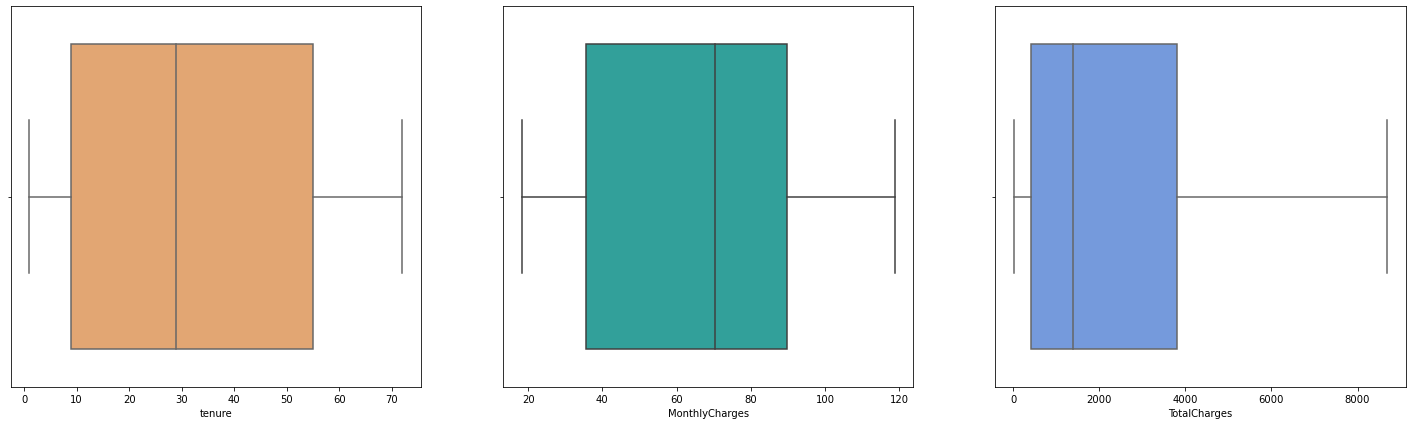

In [31]:
# visualisasi outlier menggunakan boxplot
fig, axs = plt.subplots(ncols=3, figsize=(25,7))

sns.boxplot(x="tenure", y=None, color="sandybrown", ax=axs[0], data=data)
sns.boxplot(x="MonthlyCharges", y=None, color="lightseagreen", ax=axs[1], data=data)
sns.boxplot(x="TotalCharges", y=None, color="cornflowerblue", ax=axs[2], data=data)

Tidak ada outlier dari baik dari kolom tenure, MonthlyCharges dan TotalCharges

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>],
       [<AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>],
       [<AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>]], dtype=object)

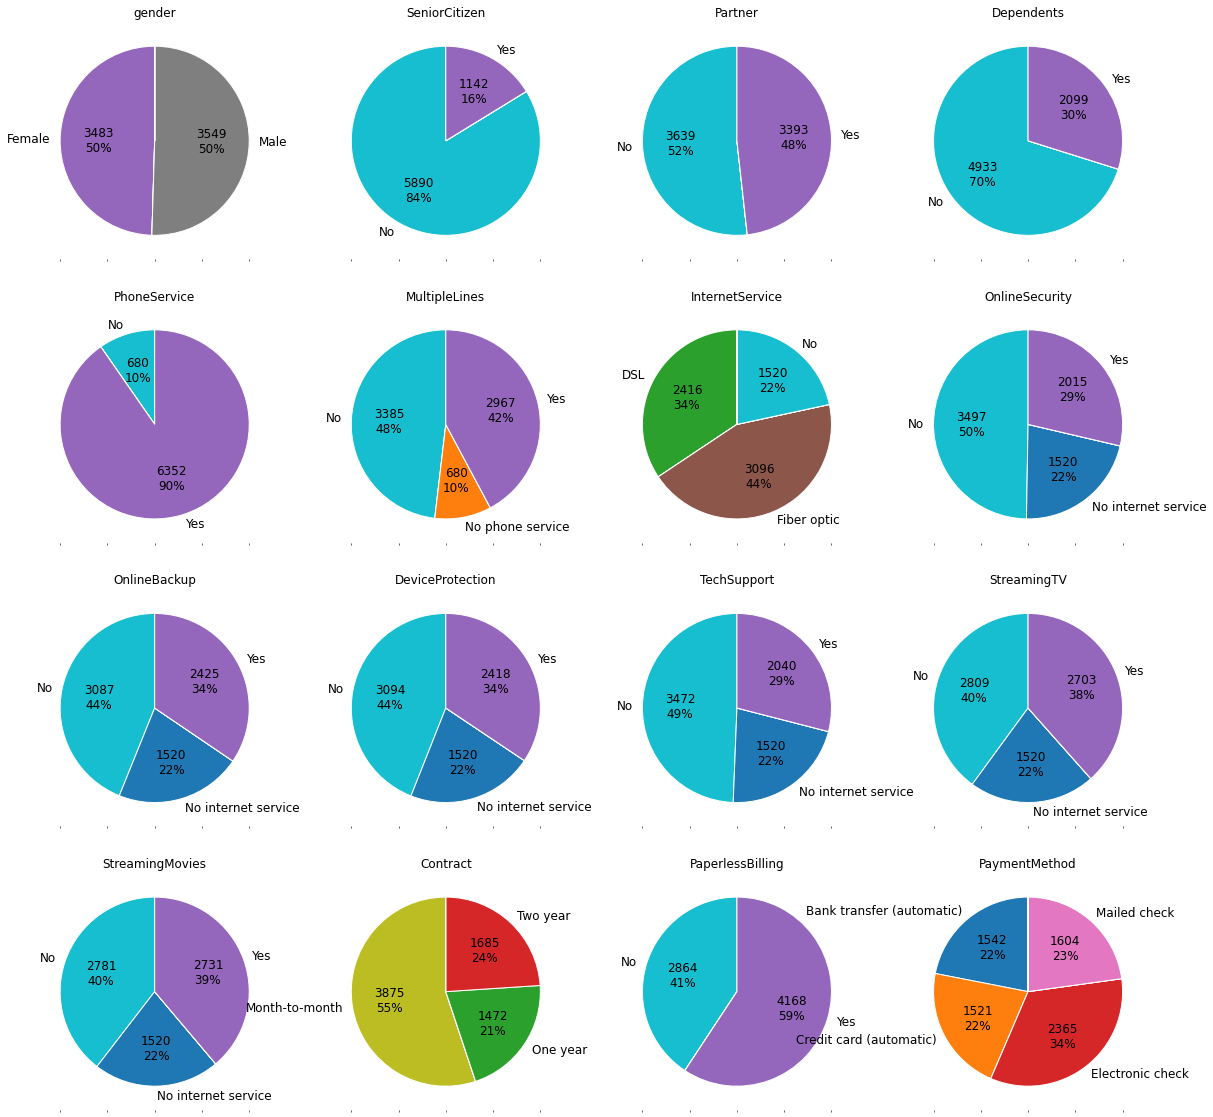

In [32]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%' if val > 1 else ''

a = data.select_dtypes(include=['object', 'bool']).iloc[:,1:-1]
b = a.apply(pd.value_counts)


b.plot(kind='pie', subplots=True,
       autopct=label_function, startangle=90, fontsize=12,
       layout=(4,4), figsize=(20,20), legend = False, ylabel='', 
       title= a.columns.to_list(),
       wedgeprops={'edgecolor': 'white', 'linewidth': 1})

<AxesSubplot:xlabel='Churn', ylabel='count'>

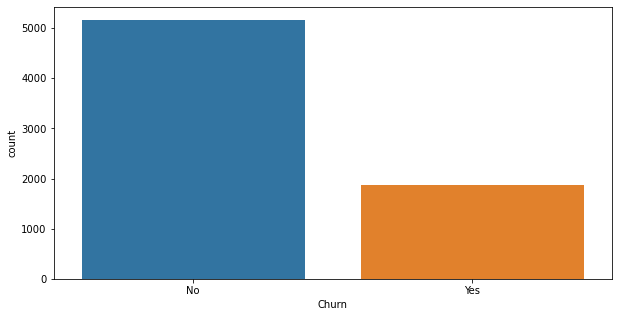

In [33]:
# Melihat jumlah total churn 

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data.Churn)

kolom target datanya tidak balance (**IMBALANCE**)

Text(0.5, 1.0, 'PaymentMethod <--> Churn')

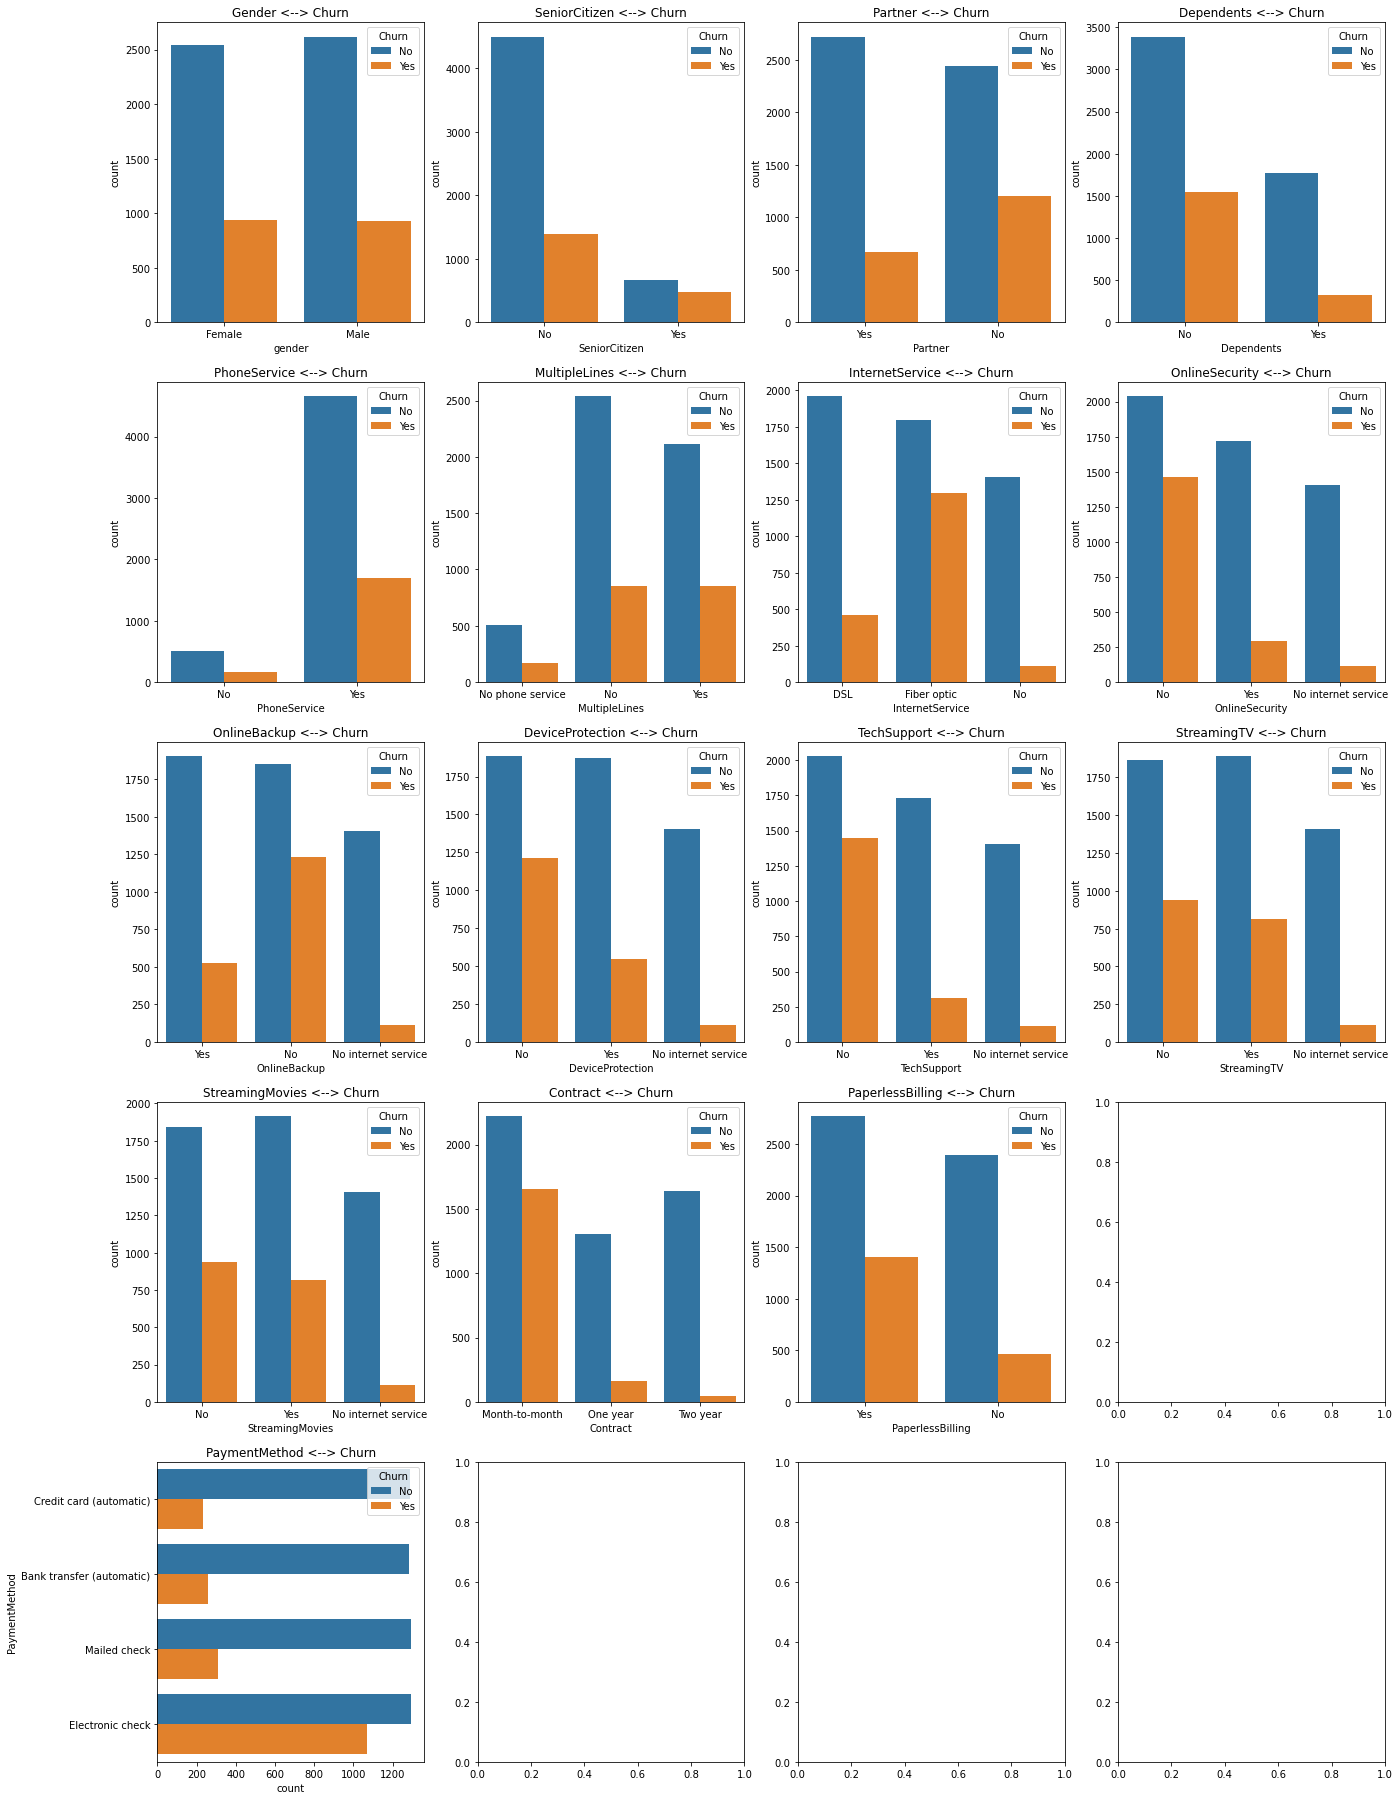

In [34]:
# Identifikasi hubungan kolom dengan tipe data kategorik dengan kolom Churn
# apakah ada trend tertentu dari hubungan kolom tipe kategorik dengan kolom Churn

f,ax=plt.subplots(5,4,figsize=(22,32))

sns.countplot(data.gender,hue=data.Churn,ax=ax[0,0])
ax[0,0].set_title('Gender <--> Churn')
sns.countplot(data.SeniorCitizen,hue=data.Churn,ax=ax[0,1])
ax[0,1].set_title('SeniorCitizen <--> Churn')
sns.countplot(data.Partner,hue=data.Churn,ax=ax[0,2])
ax[0,2].set_title('Partner <--> Churn')
sns.countplot(data.Dependents,hue=data.Churn,ax=ax[0,3])
ax[0,3].set_title('Dependents <--> Churn')

sns.countplot(data.PhoneService,hue=data.Churn,ax=ax[1,0])
ax[1,0].set_title('PhoneService <--> Churn')
sns.countplot(data.MultipleLines,hue=data.Churn,ax=ax[1,1])
ax[1,1].set_title('MultipleLines <--> Churn')
sns.countplot(data.InternetService,hue=data.Churn,ax=ax[1,2])
ax[1,2].set_title('InternetService <--> Churn')
sns.countplot(data.OnlineSecurity,hue=data.Churn,ax=ax[1,3])
ax[1,3].set_title('OnlineSecurity <--> Churn')

sns.countplot(data.OnlineBackup,hue=data.Churn,ax=ax[2,0])
ax[2,0].set_title('OnlineBackup <--> Churn')
sns.countplot(data.DeviceProtection,hue=data.Churn,ax=ax[2,1])
ax[2,1].set_title('DeviceProtection <--> Churn')
sns.countplot(data.TechSupport,hue=data.Churn,ax=ax[2,2])
ax[2,2].set_title('TechSupport <--> Churn')
sns.countplot(data.StreamingTV,hue=data.Churn,ax=ax[2,3])
ax[2,3].set_title('StreamingTV <--> Churn')

sns.countplot(data.StreamingMovies,hue=data.Churn,ax=ax[3,0])
ax[3,0].set_title('StreamingMovies <--> Churn')
sns.countplot(data.Contract,hue=data.Churn,ax=ax[3,1])
ax[3,1].set_title('Contract <--> Churn')
sns.countplot(data.PaperlessBilling,hue=data.Churn,ax=ax[3,2])
ax[3,2].set_title('PaperlessBilling <--> Churn')

sns.countplot(data=data, y="PaymentMethod",hue=data.Churn, ax=ax[4,0], order = data['PaymentMethod'].value_counts().index[::-1])
ax[4,0].set_title('PaymentMethod <--> Churn')

<AxesSubplot:xlabel='count', ylabel='MultipleLines'>

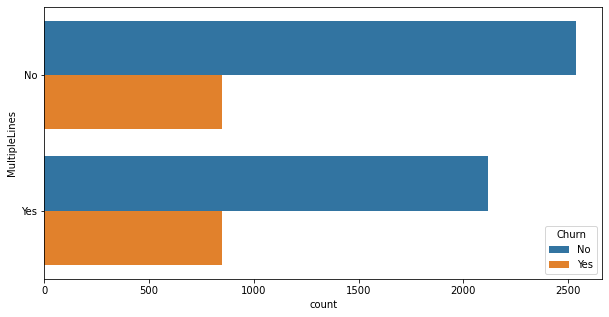

In [35]:
# relasi pengguna layanan tambahan phoneservice (MultipleLines)terhadap kolom churn

df1 = data[(data.PhoneService != "No")]
sns.countplot(y = 'MultipleLines', hue='Churn', data=df1)

# df1 = data[(data.PhoneService != "No")]
# df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)

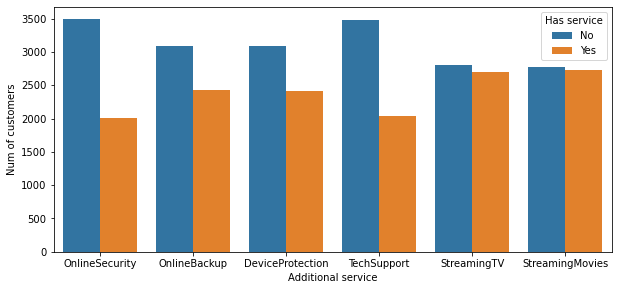

In [36]:
# melihat proporsi berapa banyak pengguna yang memiliki Internet Service dan menggunakan layanan internet tambahan

cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)

plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')

plt.show()

secara keseluruhan pengguna jasa internet `(internet service != No)`, proporsinya lebih banyak yang tidak menggunakan layanan tambahan internet _(additional internet service)_ terutama di layanan : 
- `OnlineSecurity`
- `TechSupport`
- `OnlineBackup`
- `DeviceProtection` 



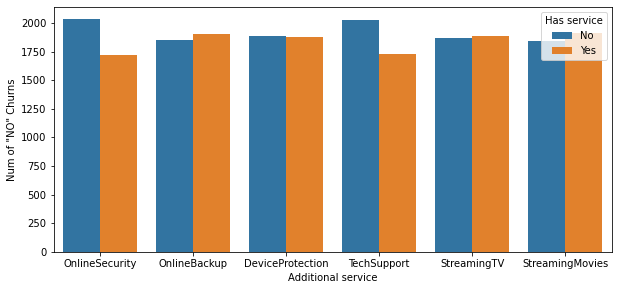

In [37]:
# melihat berapa banyak pengguna yang tidak Churn dan menggunakan layanan tambahan atau tidak

plt.figure(figsize=(10, 4.5))
df1 = data[(data.InternetService != "No") & (data.Churn == "No")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of "NO" Churns')
plt.show()

**Tidak terdapat perbedaan signifikan** ketika pelanggan internet `(internet service != No)` yang memiliki atau tidak memiliki layanan internet tambahan *(additional internet service)* dan relasinya terhadap jumlah pelanggan yg `Tidak Churn`

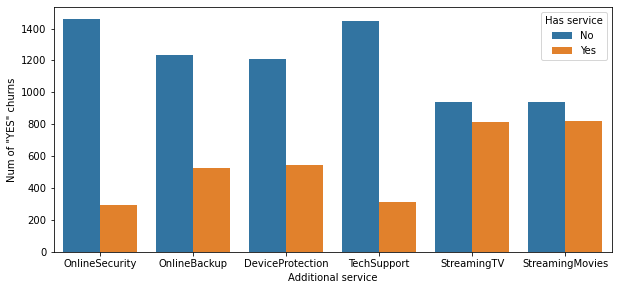

In [38]:
# melihat berapa banyak pengguna yang Churn dan menggunakan layanan tambahan atau tidak

plt.figure(figsize=(10, 4.5))
df1 = data[(data.InternetService != "No") & (data.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of "YES" churns')
plt.show()

**Terdapat perbedaan signifikan** ketika pelanggan internet `(internet service != No)` yang memiliki atau tidak memiliki layanan internet tambahan (additional internet service) dan relasinya terhadap jumlah pelanggan yg `churn`

### Menurut hasil hubungan nilai-nilai di atas, orang akan cenderung `churn` jika :

1. jenis `Contract` mereka adalah `month to month`
5. jenis `PaymentMethod` mereka adalah `electronic check`
2. jenis `InternetService` mereka adalah `fiber optics`
9. meiliki tagihan dalam bentuk tagihan kertas `yes PaperlessBIlling`
1. untuk orang yang memiliki layanan internet `InternetService = Yes`, indikator pelanggan cenderung `CHURN` ketika :
  - tidak memiliki keamanan online `no online security`
  - tidak memiliki dukungan teknis untuk pelanggan ``no online security``
  - tidak memiliki cadangan online `no online backup`
  - tidak memiliki perlindungan perangkat `no device protection`  
<br>  

### Menurut hasil hubungan nilai-nilai di atas, orang akan cenderung `tidak churn` jika :

1. memiliki `tenor` yang lebih tinggi
2. memiliki `contract` jangka waktu dua tahun `contract = two-year`
3. tidak memiliki layanan internet `internet service = no `
3. tipe jaringan internetnya menggunakan `DSL`
5. bukan seorang senior citizen `SeniorCitizen =  no`
6. tidak memiliki tanggungan `Dependents =  no`
7. memiliki phoneservice `PhoneService = yes `


Calculate the correlation / strength-of-association of features in data-set with both categorical and continuous features using :

- Pearson's R for continuous-continuous cases
- Correlation Ratio for categorical-continuous cases
- Cramer's V or Theil's U for categorical-categorical cases

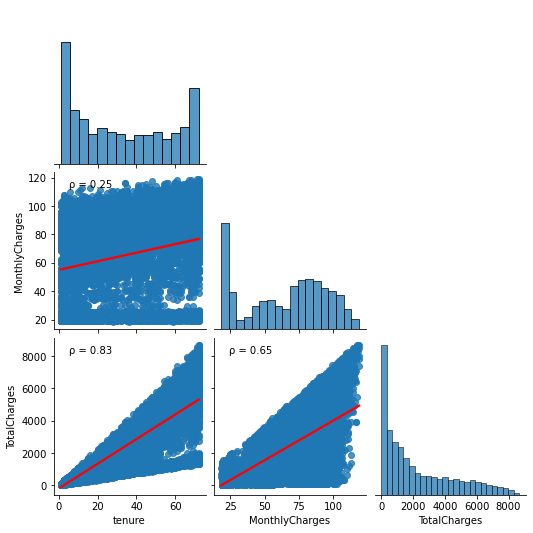

In [97]:
from scipy.stats import pearsonr 

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

pairplot = sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
pairplot.map_lower(corrfunc)

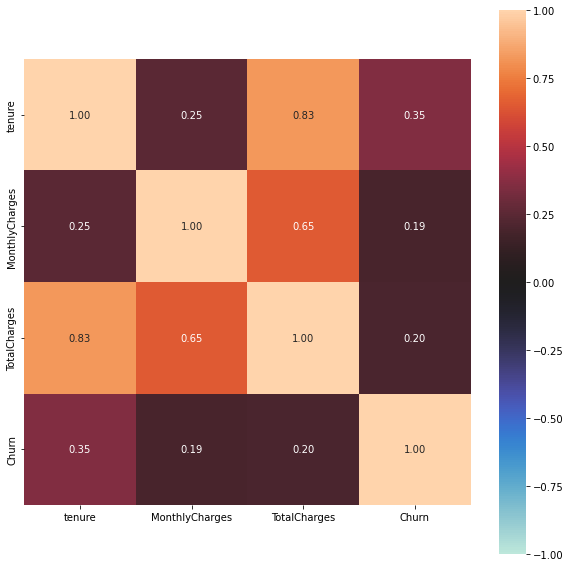

{'corr':                   tenure  MonthlyCharges  TotalCharges     Churn
 tenure          1.000000        0.246862      0.825880  0.354049
 MonthlyCharges  0.246862        1.000000      0.651065  0.192858
 TotalCharges    0.825880        0.651065      1.000000  0.199484
 Churn           0.354049        0.192858      0.199484  1.000000,
 'ax': <AxesSubplot:>}

In [99]:
# korelasi antara kolom numerik dengan kolom target bertipe kategorik menggunakan Correlation Ratio
df_numeric_and_target = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

associations(df_numeric_and_target, 
             nominal_columns = 'Churn', 
             numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges'], 
             nom_nom_assoc='correlation_ratio', 
             figsize=(10, 10))

- With corr > 0.7, the data points are said to have strong correlation. |r|=1 indicates a perfect correlation.

- With corr = 0.5, the points are said to be moderately correlated

- With corr < 0.3, the data points are said to be weakly correlated.  
<br>  
- korelasi antara kolom tenure dengan TotalCharge menunjukan korelasi positif kuat
- korelasi antara kolom tenure dengan MonthlyCharge menunjukan korelasi positif lemah
- korelasi antara kolom MonthlyCharge dengan TotalCharge menunjukan korelasi positif mendekati kuat
- asosiasi kolom target `Churn` dengan kolom numerik cukup lemah


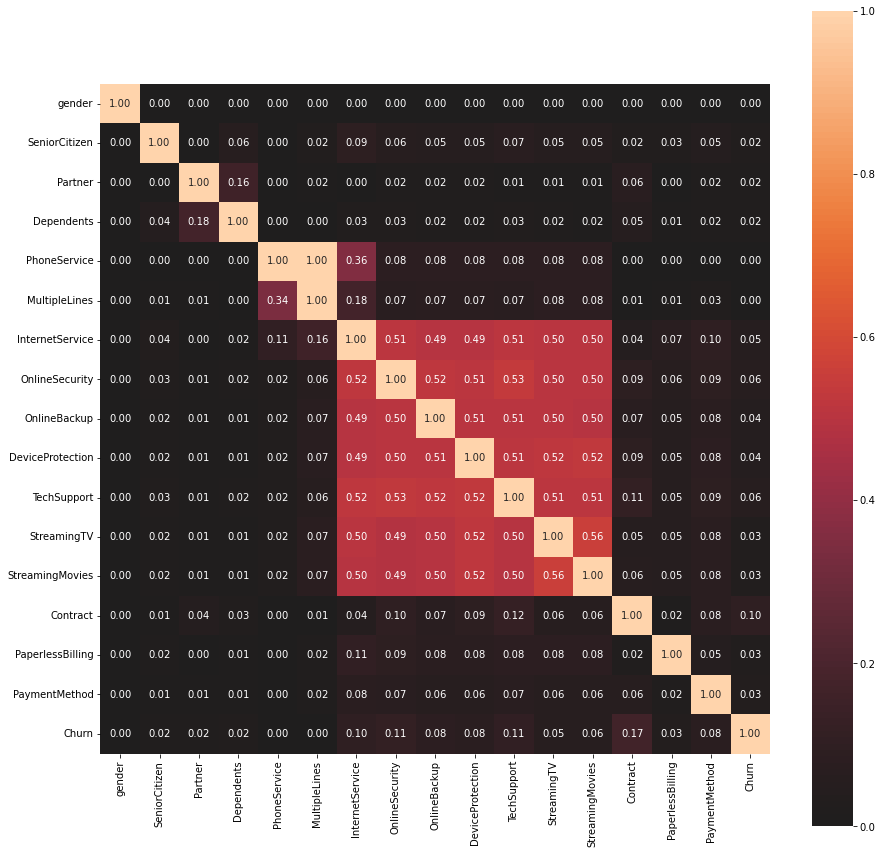

{'corr':                     gender  SeniorCitizen       Partner  Dependents  \
 gender            1.000000       0.000002  1.371933e-06    0.000077   
 SeniorCitizen     0.000004       1.000000  3.238951e-04    0.060852   
 Partner           0.000001       0.000207  1.000000e+00    0.156814   
 Dependents        0.000088       0.044286  1.781542e-01    1.000000   
 PhoneService      0.000089       0.000112  5.334254e-04    0.000002   
 MultipleLines     0.000056       0.011427  1.108743e-02    0.000333   
 InternetService   0.000059       0.036135  7.699480e-07    0.015053   
 OnlineSecurity    0.000129       0.025635  1.117805e-02    0.018026   
 OnlineBackup      0.000081       0.020409  1.113782e-02    0.012095   
 DeviceProtection  0.000011       0.020456  1.305787e-02    0.011265   
 TechSupport       0.000037       0.028090  7.848471e-03    0.015693   
 StreamingTV       0.000026       0.020728  8.804242e-03    0.009630   
 StreamingMovies   0.000048       0.021220  7.949343e-03

In [41]:
# melihat asosiasi antar feature kategorik menggunakan metode theil U

df = data[[ 'gender',
        'SeniorCitizen',
        'Partner',
        'Dependents',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod',
        'Churn']]

associations(df, nom_nom_assoc='theil', figsize=(15, 15))

---

# IMPORTING NECESARY LIBRARY FOR 
- TRAIN-TEST SPLIT
- PREPROCESSING
- MODELING
- MODEL EVALUATON

In [110]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Model Evaluation Library
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score, make_scorer, confusion_matrix, classification_report




# Data PreProcessing Library / Feature Engineering
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.feature_selection import SelectFromModel

# ML Model Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier

# Cross Validation and Hyperparameter Search
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import joblib

# X Variabel and Y variabel / Train Test split / Pipeline Data Pre-Processing

In [218]:
# memilih variabel x dan y
data_X = data.drop(['customerID', 'Churn'],axis=1)
data_y = data[['Churn']]

# ubah data pada kolom target (variabel Y) dari "Churn" dan "No Churn" menjadi angka / numerik dengan label encoder (0 dan 1)
le = LabelEncoder()
data_y= le.fit_transform(data_y['Churn'])

# splitting dataset train dan test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, stratify=data_y, random_state=42)

# memisisahkan kolom kategorikal dan numerikal agar memudahkan ditransform
num_cols = data_X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data_X.select_dtypes(include=['object', 'bool']).columns

# pipeline numerikal transformer
numerical_transformer = Pipeline(steps = 
                                        [('scaling', StandardScaler())]
                                )

# pipeline categorical transformer
categorical_transformer = Pipeline(steps = 
                                          [('encoder', OneHotEncoder(drop='if_binary'))]
                                  )

# preporocesor gabungan untuk kolom numerikal dan kategorikal
preprocessor = ColumnTransformer(transformers = 
                                                [('num_trnsfrm', numerical_transformer, num_cols),
                                                 ('cat_trnsfrm', categorical_transformer, cat_cols)]
                                )

## MODELING BASELINE  CLASSIFIER MODEL (MODEL BENCHMARK)
- SCV
- KNN
- LogisticRegression
- DECISION TREE
- RANDOM FOREST
- ADA BOOST
- MLP
- Gradient Boosting 
- LGBM 
- XGBOOST

## SVC

In [174]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', SVC(random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.729 (0.023)
Cross Validation precision	: 0.495 (0.026)
Cross Validation recal	: 0.789 (0.036)
Cross Validation f1	: 0.608 (0.028)
Cross Validation roc_auc	: 0.824 (0.019)


## KNN

In [175]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', KNeighborsClassifier())])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.669 (0.022)
Cross Validation precision	: 0.432 (0.022)
Cross Validation recal	: 0.764 (0.034)
Cross Validation f1	: 0.551 (0.025)
Cross Validation roc_auc	: 0.753 (0.023)


## LogisticRegression

In [220]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', LogisticRegression(max_iter = 1000, random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')


Cross Validation accuracy	: 0.724 (0.019)
Cross Validation precision	: 0.49 (0.021)
Cross Validation recal	: 0.847 (0.028)
Cross Validation f1	: 0.62 (0.021)
Cross Validation roc_auc	: 0.845 (0.019)


## DECISION TREE

In [92]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', DecisionTreeClassifier(random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.729 (0.018)
Cross Validation precision	: 0.492 (0.03)
Cross Validation recal	: 0.537 (0.025)
Cross Validation f1	: 0.513 (0.025)
Cross Validation roc_auc	: 0.668 (0.018)


## RANDOM FOREST

In [51]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', RandomForestClassifier(random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.78 (0.019)
Cross Validation precision	: 0.588 (0.038)
Cross Validation recal	: 0.58 (0.035)
Cross Validation f1	: 0.584 (0.033)
Cross Validation roc_auc	: 0.821 (0.019)


## ADA BOOST

In [52]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', AdaBoostClassifier(random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.767 (0.019)
Cross Validation precision	: 0.546 (0.027)
Cross Validation recal	: 0.74 (0.04)
Cross Validation f1	: 0.628 (0.028)
Cross Validation roc_auc	: 0.844 (0.018)


## MLP

In [53]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', MLPClassifier(random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.742 (0.018)
Cross Validation precision	: 0.512 (0.027)
Cross Validation recal	: 0.673 (0.043)
Cross Validation f1	: 0.581 (0.03)
Cross Validation roc_auc	: 0.799 (0.022)


## Gradient Boosting Classifier

In [54]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', GradientBoostingClassifier(random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.789 (0.018)
Cross Validation precision	: 0.592 (0.032)
Cross Validation recal	: 0.674 (0.032)
Cross Validation f1	: 0.63 (0.028)
Cross Validation roc_auc	: 0.845 (0.019)


## LGBM

In [55]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', LGBMClassifier(random_state=42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.789 (0.016)
Cross Validation precision	: 0.604 (0.033)
Cross Validation recal	: 0.604 (0.033)
Cross Validation f1	: 0.603 (0.027)
Cross Validation roc_auc	: 0.837 (0.019)


## XGBOOST

In [219]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', XGBClassifier(objective="binary:logistic", 
                                                              max_iter = 1000, 
                                                              use_label_encoder=False, 
                                                              random_state=42, 
                                                              eval_metric = 'logloss'))]) # beberapa metric ditulis karena menghndari warning, nilainya semua default



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

Cross Validation accuracy	: 0.78 (0.015)
Cross Validation precision	: 0.591 (0.031)
Cross Validation recal	: 0.566 (0.031)
Cross Validation f1	: 0.578 (0.027)
Cross Validation roc_auc	: 0.824 (0.019)


---

# HYPERPARAMETER SEARCH

## LOGISTIC REGRESSION GRID SEARCH CV

In [269]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', LogisticRegression(max_iter=10000, random_state=42))])

param_grid = {'classifier_model__penalty' : ['l1', 'l2'],
              'classifier_model__l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'classifier_model__C' : np.logspace(-4,4,20),
              'classifier_model__solver' : ['newton-cg', 'lbfgs', 'liblinear']}

cv = StratifiedKFold(n_splits=10)

scoring = {
           'AUC' : make_scorer(roc_auc_score), 
           'Accuracy' : make_scorer(accuracy_score),
           'Precision' : make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1' : make_scorer(f1_score),
          }

LR_GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring, verbose=1, refit='AUC', n_jobs=-1, return_train_score=True)

LR_grid_result = LR_GSCV.fit(X_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/pyt

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/pyt

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/pyt

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/pyt

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/pyt

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/pyt

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

In [270]:
pd.set_option('display.max_columns', None)

tabel_LR_grid_result = pd.DataFrame(LR_grid_result.cv_results_)

tabel_LR_grid_result = pd.DataFrame(LR_grid_result.cv_results_).sort_values(['rank_test_AUC'])
tabel_LR_grid_result[['mean_test_AUC', 'mean_test_Accuracy', 'mean_test_Precision', 'mean_test_recall', 'mean_test_f1', 
             'rank_test_AUC', 'rank_test_Accuracy', 'rank_test_Precision', 'rank_test_recall', 'rank_test_f1']].sort_values(['rank_test_AUC']).head(1)

,mean_test_AUC,mean_test_Accuracy,mean_test_Precision,mean_test_recall,mean_test_f1,rank_test_AUC,rank_test_Accuracy,rank_test_Precision,rank_test_recall,rank_test_f1
442,0.768537,0.731558,0.497457,0.847485,0.626758,1,171,140,390,2


In [285]:
print("\033[1m--------------------------------------------------------\033[0m")
y_pred_train = LR_grid_result.predict(X_train)

print(f'training accuracy score: {accuracy_score(y_train, y_pred_train)}')
print(f'training precision score: {precision_score(y_train, y_pred_train)}')
print(f'training recall score: {recall_score(y_train, y_pred_train)}')
print(f'training f1 score: {f1_score(y_train, y_pred_train)}')
print(f'training auc score: {roc_auc_score(y_train, y_pred_train)}')

print("\033[1m--------------------------------------------------------\033[0m")
y_pred_test = LR_grid_result.predict(X_test)

print(f'testing accuracy score: {accuracy_score(y_test, y_pred_test)}')
print(f'testing precision score: {precision_score(y_test, y_pred_test)}')
print(f'testing recall score: {recall_score(y_test, y_pred_test)}')
print(f'testing f1 score: {f1_score(y_test, y_pred_test)}')
print(f'testing auc score: {roc_auc_score(y_test, y_pred_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred_test))

--------------------------------------------------------
training accuracy score: 0.7306666666666667
training precision score: 0.49606299212598426
training recall score: 0.842809364548495
training f1 score: 0.6245353159851302
training auc score: 0.7664410018868382
--------------------------------------------------------
testing accuracy score: 0.7050461975835111
testing precision score: 0.46907993966817496
testing recall score: 0.8315508021390374
testing f1 score: 0.5998071359691417
testing auc score: 0.7453978599272147
--------------------------------------------------------
[[681 352]
 [ 63 311]]


In [272]:
LR_grid_result.best_params_

{'classifier_model__C': 0.08858667904100823,
 'classifier_model__l1_ratio': 0.2,
 'classifier_model__penalty': 'l2',
 'classifier_model__solver': 'lbfgs'}

**mencoba model dengan parameter terbaik dari LR_grid_result**

In [316]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', LogisticRegression(max_iter = 1000, 
                                                                   C = 0.01,
                                                                   l1_ratio = 0.9,
                                                                   penalty = 'l2',
                                                                   random_state = 42))])



cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test) 

print("\033[1m--------------------------------------------------------\033[0m")

print(f'testing accuracy score: {accuracy_score(y_pred, y_test)}')
print(f'testing precision score: {precision_score(y_pred, y_test)}')
print(f'testing recall score: {recall_score(y_pred, y_test)}')
print(f'testing f1 score: {f1_score(y_pred, y_test)}')
print(f'testing auc score: {roc_auc_score(y_pred, y_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred))

Cross Validation accuracy	: 0.735 (0.021)
Cross Validation precision	: 0.502 (0.024)
Cross Validation recal	: 0.825 (0.027)
Cross Validation f1	: 0.624 (0.023)
Cross Validation roc_auc	: 0.845 (0.019)
--------------------------------------------------------
testing accuracy score: 0.7128642501776831
testing precision score: 0.8155080213903744
testing recall score: 0.4765625
testing f1 score: 0.601577909270217
testing auc score: 0.6933008067144719
--------------------------------------------------------
[[698 335]
 [ 69 305]]


In [274]:
import joblib

#save your model or results
joblib.dump(LR_grid_result, 'LR_grid_result.pkl')

#save tabel gridsearch
tabel_LR_grid_result.to_csv('tabel_LR_grid_result')

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

## GRADIENT BOOSTING GRID SEARCH CV

In [68]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', GradientBoostingClassifier(random_state=42))])


param_grid = {
                "classifier_model__n_estimators":[5, 50, 250, 500],
                "classifier_model__max_depth":[1, 3, 5, 7, 9],
                "classifier_model__learning_rate":[0.01, 0.1, 1, 10]
            }


cv = StratifiedKFold(n_splits=10)

scoring = {'AUC':'roc_auc', 
           'Accuracy':make_scorer(accuracy_score),
           'Precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score),
           'f1':make_scorer(f1_score),
          }

GBM_GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring, verbose=1, refit='f1', n_jobs=-1, return_train_score=True)

GBM_grid_result = GBM_GSCV.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zahramawar/diaz-ds-projects/env/lib/pyt

In [281]:
pd.set_option('display.max_columns', None)

tabel_GBM_grid_result = pd.DataFrame(GBM_grid_result.cv_results_)

tabel_GBM_grid_result = pd.DataFrame(GBM_grid_result.cv_results_).sort_values(['rank_test_AUC'])
tabel_GBM_grid_result[['mean_test_AUC', 'mean_test_Accuracy', 'mean_test_Precision', 'mean_test_recall', 'mean_test_f1', 
                       'rank_test_AUC', 'rank_test_Accuracy', 'rank_test_Precision', 'rank_test_recall', 'rank_test_f1']].sort_values(['rank_test_AUC']).head(1)

,mean_test_AUC,mean_test_Accuracy,mean_test_Precision,mean_test_recall,mean_test_f1,rank_test_AUC,rank_test_Accuracy,rank_test_Precision,rank_test_recall,rank_test_f1
23,0.849269,0.766046,0.541476,0.794644,0.643829,1,29,36,16,1


/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

In [287]:
print("\033[1m--------------------------------------------------------\033[0m")
y_pred_train = GBM_grid_result.predict(X_train)

print(f'training accuracy score: {accuracy_score(y_train, y_pred_train)}')
print(f'training precision score: {precision_score(y_train, y_pred_train)}')
print(f'training recall score: {recall_score(y_train, y_pred_train)}')
print(f'training f1 score: {f1_score(y_train, y_pred_train)}')
print(f'training auc score: {roc_auc_score(y_train, y_pred_train)}')

print("\033[1m--------------------------------------------------------\033[0m")
y_pred = GBM_grid_result.predict(X_test) 

print(f'testing accuracy score: {accuracy_score(y_test, y_pred_test)}')
print(f'testing precision score: {precision_score(y_test, y_pred_test)}')
print(f'testing recall score: {recall_score(y_test, y_pred_test)}')
print(f'testing f1 score: {f1_score(y_test, y_pred_test)}')
print(f'testing auc score: {roc_auc_score(y_test, y_pred_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred_test))

--------------------------------------------------------
training accuracy score: 0.7664
training precision score: 0.540784136998648
training recall score: 0.802675585284281
training f1 score: 0.6462035541195477
training auc score: 0.7779721752087265
--------------------------------------------------------
testing accuracy score: 0.7050461975835111
testing precision score: 0.46907993966817496
testing recall score: 0.8315508021390374
testing f1 score: 0.5998071359691417
testing auc score: 0.7453978599272147
--------------------------------------------------------
[[681 352]
 [ 63 311]]


In [104]:
GBM_grid_result.best_params_

{'classifier_model__learning_rate': 0.1,
 'classifier_model__max_depth': 1,
 'classifier_model__n_estimators': 500}

**mencoba model dengan parameter terbaik dari GBM_grid_result**

In [315]:
# pipeline model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', GradientBoostingClassifier(learning_rate = 0.1, 
                                                                           max_depth = 1,
                                                                           n_estimators = 500))])


cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)

for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test) 

print("\033[1m--------------------------------------------------------\033[0m")

print(f'testing accuracy score: {accuracy_score(y_pred, y_test)}')
print(f'testing precision score: {precision_score(y_pred, y_test)}')
print(f'testing recall score: {recall_score(y_pred, y_test)}')
print(f'testing f1 score: {f1_score(y_pred, y_test)}')
print(f'testing auc score: {roc_auc_score(y_pred, y_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred))


Cross Validation accuracy	: 0.769 (0.024)
Cross Validation precision	: 0.549 (0.034)
Cross Validation recal	: 0.767 (0.032)
Cross Validation f1	: 0.639 (0.03)
Cross Validation roc_auc	: 0.848 (0.018)
--------------------------------------------------------
testing accuracy score: 0.738450604122246
testing precision score: 0.7620320855614974
testing recall score: 0.5053191489361702
testing f1 score: 0.607675906183369
testing auc score: 0.6998719113601373
--------------------------------------------------------
[[754 279]
 [ 89 285]]


In [ ]:
import joblib

#save your model or results
joblib.dump(GBM_grid_result, 'GBM_grid_result.pkl')

#save tabel gridsearch
tabel_GBM_grid_result.to_csv('tabel_GBM_grid_result')

## XGBOOST GRID SEARCH CV

In [203]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', XGBClassifier(objective="binary:logistic", eval_metric = 'logloss', booster='gbtree', use_label_encoder=False, random_state=42))])


param_grid = {
                "classifier_model__max_depth": [3, 4, 5, 7],
                "classifier_model__learning_rate": [0.1, 0.01, 0.05],
                "classifier_model__gamma": [0, 0.25, 1],
                "classifier_model__reg_lambda": [0, 1, 10],
                "classifier_model__scale_pos_weight": [1, 3, 5],
                "classifier_model__subsample": [0.8],
                "classifier_model__colsample_bytree": [0.5]
            }

cv = StratifiedKFold(n_splits=10)

scoring = {'AUC':'roc_auc', 
           'Accuracy':make_scorer(accuracy_score),
           'Precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score),
           'f1':make_scorer(f1_score),
          }

XGB_GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring, verbose=1, refit='AUC', n_jobs=-1, return_train_score=True)

XGB_grid_result = XGB_GSCV.fit(X_train, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


In [282]:
pd.set_option('display.max_columns', None)

tabel_XGB_grid_result = pd.DataFrame(XGB_grid_result.cv_results_)

tabel_XGB_grid_result = pd.DataFrame(XGB_grid_result.cv_results_).sort_values(['rank_test_AUC'])
tabel_XGB_grid_result[['mean_test_AUC', 'mean_test_Accuracy', 'mean_test_Precision', 'mean_test_recall', 'mean_test_f1', 
                       'rank_test_AUC', 'rank_test_Accuracy', 'rank_test_Precision', 'rank_test_recall', 'rank_test_f1']].sort_values(['rank_test_AUC']).head(1)

,mean_test_AUC,mean_test_Accuracy,mean_test_Precision,mean_test_recall,mean_test_f1,rank_test_AUC,rank_test_Accuracy,rank_test_Precision,rank_test_recall,rank_test_f1
108,0.847326,0.787549,0.586968,0.680877,0.630269,1,29,35,287,36


In [288]:
print("\033[1m--------------------------------------------------------\033[0m")
y_pred_train = XGB_grid_result.predict(X_train)

print(f'training accuracy score: {accuracy_score(y_train, y_pred_train)}')
print(f'training precision score: {precision_score(y_train, y_pred_train)}')
print(f'training recall score: {recall_score(y_train, y_pred_train)}')
print(f'training f1 score: {f1_score(y_train, y_pred_train)}')
print(f'training auc score: {roc_auc_score(y_train, y_pred_train)}')

print("\033[1m--------------------------------------------------------\033[0m")
y_pred_test = XGB_grid_result.predict(X_test)

print(f'testing accuracy score: {accuracy_score(y_test, y_pred_test)}')
print(f'testing precision score: {precision_score(y_test, y_pred_test)}')
print(f'testing recall score: {recall_score(y_test, y_pred_test)}')
print(f'testing f1 score: {f1_score(y_test, y_pred_test)}')
print(f'testing auc score: {roc_auc_score(y_test, y_pred_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred_test))

--------------------------------------------------------
training accuracy score: 0.8040888888888889
training precision score: 0.6128661688684663
training recall score: 0.7137123745819398
training f1 score: 0.6594561186650186
training auc score: 0.7752581243369747
--------------------------------------------------------
testing accuracy score: 0.7654584221748401
testing precision score: 0.5462184873949579
testing recall score: 0.6951871657754011
testing f1 score: 0.6117647058823529
testing auc score: 0.7430437280958323
--------------------------------------------------------
[[817 216]
 [114 260]]


In [211]:
XGB_grid_result.best_params_

{'classifier_model__colsample_bytree': 0.5,
 'classifier_model__gamma': 0.25,
 'classifier_model__learning_rate': 0.1,
 'classifier_model__max_depth': 3,
 'classifier_model__reg_lambda': 0,
 'classifier_model__scale_pos_weight': 1,
 'classifier_model__subsample': 0.8}

**buat model berdasarkan parameter terbaik dari XGBOOST GRIDSEARCH CV**

In [314]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', XGBClassifier(objective = "binary:logistic",
                                                              booster='gbtree', 
                                                              use_label_encoder=False, 
                                                              colsample_bytree = 0.5, 
                                                              gamma = 0.25, 
                                                              learning_rate = 0.1, 
                                                              max_depth = 5, 
                                                              reg_lambda = 1, 
                                                              scale_pos_weight = 1, 
                                                              subsample = 0.8,
                                                              eval_metric = 'logloss',
                                                              random_state=42))])
                


cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)


for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')
    
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test) 

print("\033[1m--------------------------------------------------------\033[0m")

print(f'testing accuracy score: {accuracy_score(y_pred, y_test)}')
print(f'testing precision score: {precision_score(y_pred, y_test)}')
print(f'testing recall score: {recall_score(y_pred, y_test)}')
print(f'testing f1 score: {f1_score(y_pred, y_test)}')
print(f'testing auc score: {roc_auc_score(y_pred, y_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred))

Cross Validation accuracy	: 0.792 (0.017)
Cross Validation precision	: 0.605 (0.034)
Cross Validation recal	: 0.635 (0.031)
Cross Validation f1	: 0.619 (0.026)
Cross Validation roc_auc	: 0.843 (0.019)
--------------------------------------------------------
testing accuracy score: 0.7768301350390903
testing precision score: 0.6470588235294118
testing recall score: 0.5707547169811321
testing f1 score: 0.6065162907268171
testing auc score: 0.7182359546248489
--------------------------------------------------------
[[851 182]
 [132 242]]


In [ ]:
import joblib

#save your model or results
joblib.dump(XGB_grid_result, 'XGB_grid_result.pkl')

#save tabel gridsearch
tabel_XGB_grid_result.to_csv('tabel_XGB_grid_result')

## LGBM GRID SEARCH CV

In [292]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', LGBMClassifier(random_state=42))])


param_grid = {'classifier_model__learning_rate': [0.005, 0.01],
              'classifier_model__n_estimators': [8,16,24],
              'classifier_model__num_leaves': [6,8,12,16],
              'classifier_model__boosting_type' : ['gbdt', 'dart'],
              'classifier_model__objective' : ['binary'],
              'classifier_model__max_bin':[255, 510],
              'classifier_model__random_state' : [500],
              'classifier_model__colsample_bytree' : [0.64, 0.65, 0.66],
              'classifier_model__subsample' : [0.7,0.75],
              'classifier_model__reg_alpha' : [1,1.2],
              'classifier_model__reg_lambda' : [1,1.2,1.4],}

cv = StratifiedKFold(n_splits=5)

scoring = {'AUC':'roc_auc', 
           'Accuracy':make_scorer(accuracy_score),
           'Precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score),
           'f1':make_scorer(f1_score),
          }

LGBM_GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring, verbose=1, refit='AUC', n_jobs=-1, return_train_score=True)

LGBM_grid_result = LGBM_GSCV.fit(X_train, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


In [293]:
pd.set_option('display.max_columns', None)

tabel_LGBM_grid_result = pd.DataFrame(LGBM_grid_result.cv_results_)

tabel_LGBM_grid_result = pd.DataFrame(LGBM_grid_result.cv_results_).sort_values(['rank_test_AUC'])
tabel_LGBM_grid_result[['mean_test_AUC', 'mean_test_Accuracy', 'mean_test_Precision', 'mean_test_recall', 'mean_test_f1', 
                       'rank_test_AUC', 'rank_test_Accuracy', 'rank_test_Precision', 'rank_test_recall', 'rank_test_f1']].sort_values(['rank_test_AUC']).head(1)

,mean_test_AUC,mean_test_Accuracy,mean_test_Precision,mean_test_recall,mean_test_f1,rank_test_AUC,rank_test_Accuracy,rank_test_Precision,rank_test_recall,rank_test_f1
1719,0.839147,0.746844,0.515768,0.784615,0.621962,1,388,748,1382,12


In [317]:
print("\033[1m--------------------------------------------------------\033[0m")
y_pred_train = LGBM_grid_result.predict(X_train)

print(f'training accuracy score: {accuracy_score(y_train, y_pred_train)}')
print(f'training precision score: {precision_score(y_train, y_pred_train)}')
print(f'training recall score: {recall_score(y_train, y_pred_train)}')
print(f'training f1 score: {f1_score(y_train, y_pred_train)}')
print(f'training auc score: {roc_auc_score(y_train, y_pred_train)}')

print("\033[1m--------------------------------------------------------\033[0m")
y_pred_test = LGBM_grid_result.predict(X_test)

print(f'testing accuracy score: {accuracy_score(y_test, y_pred_test)}')
print(f'testing precision score: {precision_score(y_test, y_pred_test)}')
print(f'testing recall score: {recall_score(y_test, y_pred_test)}')
print(f'testing f1 score: {f1_score(y_test, y_pred_test)}')
print(f'testing auc score: {roc_auc_score(y_test, y_pred_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred_test))

--------------------------------------------------------
training accuracy score: 0.7386666666666667
training precision score: 0.5052061640982923
training recall score: 0.811371237458194
training f1 score: 0.6226899383983572
training auc score: 0.7618599528695329
--------------------------------------------------------
testing accuracy score: 0.7142857142857143
testing precision score: 0.47791798107255523
testing recall score: 0.8101604278074866
testing f1 score: 0.6011904761904762
testing auc score: 0.7448672419773154
--------------------------------------------------------
[[702 331]
 [ 71 303]]


/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zahramawar/diaz-ds-projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio paramet

In [295]:
LGBM_grid_result.best_params_

{'classifier_model__boosting_type': 'gbdt',
 'classifier_model__colsample_bytree': 0.66,
 'classifier_model__learning_rate': 0.01,
 'classifier_model__max_bin': 510,
 'classifier_model__n_estimators': 24,
 'classifier_model__num_leaves': 16,
 'classifier_model__objective': 'binary',
 'classifier_model__random_state': 500,
 'classifier_model__reg_alpha': 1,
 'classifier_model__reg_lambda': 1.2,
 'classifier_model__subsample': 0.75}

**buat model berdasarkan parameter terbaik dari LGBM GRIDSEARCH CV**

In [311]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('balance', ADASYN()),
                           ('classifier_model', LGBMClassifier(objective = 'binary',
                                                               boosting_type = 'gbdt',
                                                               colsample_bytree = 0.66,
                                                               learning_rate = 0.01,
                                                               max_bin = 510,
                                                               n_estimators = 24,
                                                               num_leaves = 16,
                                                               reg_alpha = 1,
                                                               reg_lambda = 1.2,
                                                               subsample = 0.75,
                                                               random_state = 500))])


cv_scoring = {'accuracy'  : 'accuracy',
              'precision' : 'precision',
              'recal'     : 'recall',
              'f1'        : 'f1',
              'roc_auc'   : 'roc_auc'}

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(pipeline, X_train, y_train, scoring=cv_scoring, cv=cv, n_jobs=-1)


for scoring in cv_scoring:
  tmp = f'test_{scoring}'
  print(f'Cross Validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')
    
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test) 

print("\033[1m--------------------------------------------------------\033[0m")

print(f'testing accuracy score: {accuracy_score(y_pred, y_test)}')
print(f'testing precision score: {precision_score(y_pred, y_test)}')
print(f'testing recall score: {recall_score(y_pred, y_test)}')
print(f'testing f1 score: {f1_score(y_pred, y_test)}')
print(f'testing auc score: {roc_auc_score(y_pred, y_test)}')

print("\033[1m--------------------------------------------------------\033[0m")
print(confusion_matrix(y_test, y_pred))

Cross Validation accuracy	: 0.741 (0.016)
Cross Validation precision	: 0.508 (0.019)
Cross Validation recal	: 0.797 (0.055)
Cross Validation f1	: 0.62 (0.026)
Cross Validation roc_auc	: 0.839 (0.022)
--------------------------------------------------------
testing accuracy score: 0.7221037668798863
testing precision score: 0.8155080213903744
testing recall score: 0.4864433811802233
testing f1 score: 0.6093906093906094
testing auc score: 0.6989909213593425
--------------------------------------------------------
[[711 322]
 [ 69 305]]


In [ ]:
import joblib

#save your model or results
joblib.dump(XGB_grid_result, 'XGB_grid_result.pkl')

#save tabel gridsearch
tabel_XGB_grid_result.to_csv('tabel_XGB_grid_result')